In [2]:
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# load DataSet
df1 = sns.load_dataset('tips')

In [4]:
df1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
# mean median mode percentiles
mean = np.mean(df1['total_bill'])
median = np.median(df1['total_bill'])
mode = statistics.mode(df1['total_bill'])
percentiles = np.percentile(df1['total_bill'],[0,25,50,75,100])

In [6]:
percentiles

array([ 3.07  , 13.3475, 17.795 , 24.1275, 50.81  ])

In [7]:
mean , median , mode

(19.78594262295082, 17.795, 13.42)

<Axes: >

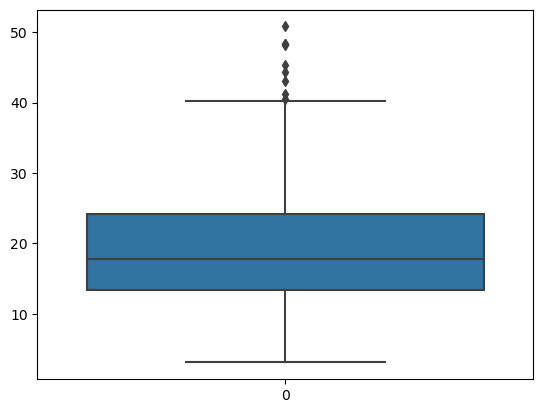

In [8]:
sns.boxplot(df1['total_bill'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_bill', ylabel='Count'>

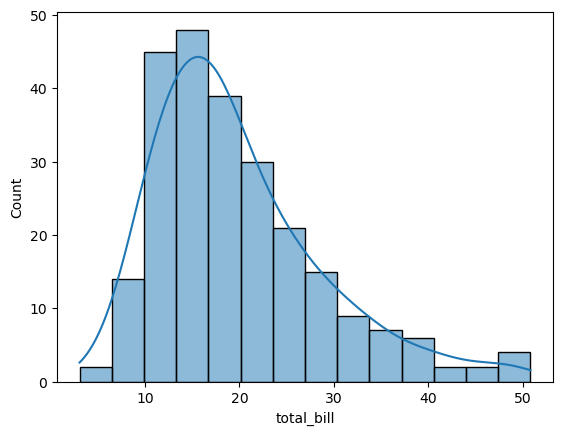

In [9]:
sns.histplot(df1['total_bill'],kde=True)

In [10]:
df2 = sns.load_dataset('iris')

In [11]:
df2

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='sepal_length', ylabel='Count'>

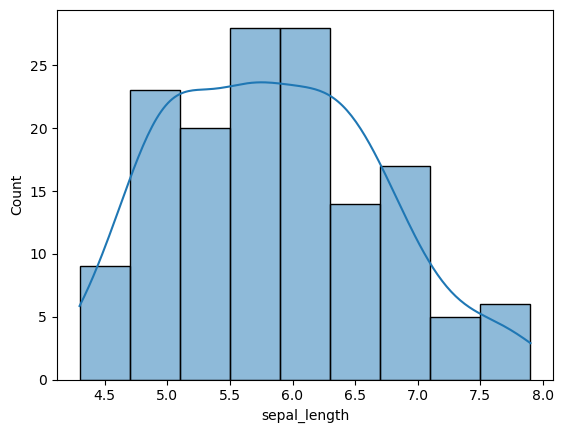

In [12]:
sns.histplot(df2['sepal_length'],kde=True)
 # It does not follow normal / gaussion distribution

In [ ]:
sns.histplot(df2['sepal_width'],kde=True)
# It does not follow normal / gaussion distribution

In [ ]:
sns.countplot(x ='species', data = df2)

In [29]:

## Define our dataset
df3= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]


<Axes: >

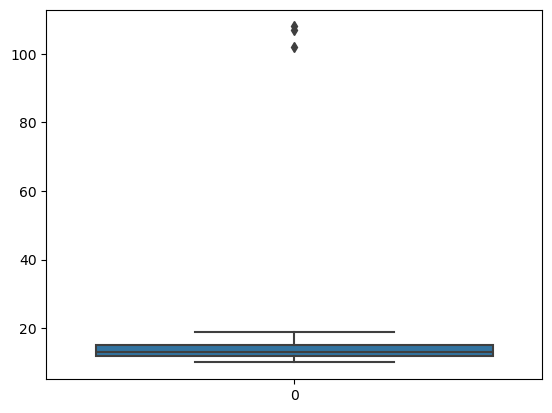

In [31]:
# Outliers Method 1
sns.boxplot(df3)
# We can see in the boxplot that we have 3 outliers 102 ,107 and 108

In [51]:
# Outliers Method 2

def outliers_iqr_method(dataset):
    q3,q1 = np.percentile(dataset,[75,25])
    iqr = q3 - q1
    lower_fence =  q1 - 1.5 * iqr
    higher_fence = q3 + 1.5 * iqr
    outliers = []
    for item in dataset:
        if (item > higher_fence) or (item < lower_fence) :
            outliers.append(item)
    return outliers


In [52]:
print(f'The outliers are {outliers_iqr_method(df3)}:')

The outliers are [102, 107, 108]:


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

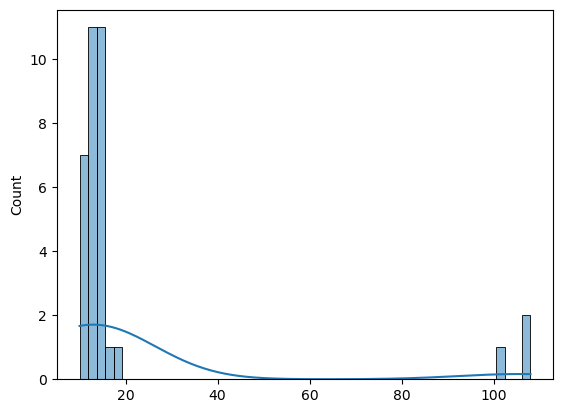

In [53]:
# Outliers Method 3
sns.histplot(df3,kde=True)


In [1]:
def outliers_zscore_method(dataset):
    outliers = []
    mean = np.mean(dataset)
    std = np.std(dataset)
    threshold = np.abs(3) 
    for item in dataset:
        zscore = (item - mean)/std
        if (zscore > threshold ) :
            outliers.append(item)
    return outliers

In [48]:
print(f'The outliers are {outliers_zscore_method(df3)}:')

The outliers are [102, 107, 108]:
